In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from selflearn import Interaction
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

In [2]:
life = Interaction()

In [3]:
life.inference_step()

/home/sergei/git/science/causality-disentanglement/debug/selflearn/selflearn.py:37: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


(tensor([[-2.6193, -1.8007, -3.0762,  ..., -2.0212, -2.2070, -3.0757],
         [-2.4948, -1.9237, -2.5658,  ..., -2.3611, -2.3668, -2.6669],
         [-2.2124, -2.2544, -2.3922,  ..., -2.4634, -2.4599, -2.3849],
         ...,
         [-2.4722, -2.3063, -2.6988,  ..., -2.1043, -2.6297, -2.5859],
         [-2.3181, -2.0830, -2.4017,  ..., -2.2241, -2.4007, -2.5322],
         [-2.0250, -2.4222, -2.4747,  ..., -2.5959, -2.4498, -2.4808]],
        device='cuda:0', grad_fn=<LogSoftmaxBackward>),
 tensor(0.9405, device='cuda:0', grad_fn=<ExpBackward>))

In [4]:
stats = {'lr': [], 'loss': []}

In [5]:
for _ in tqdm(range(1000)):
    life.selflearn()

    stats['lr'].append(life.lr_out.item())
    stats['loss'].append(life.model.loss.item())

In [6]:
2048 * 1000

2048000

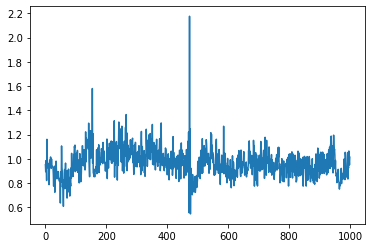

In [7]:
plt.plot(stats['lr'])

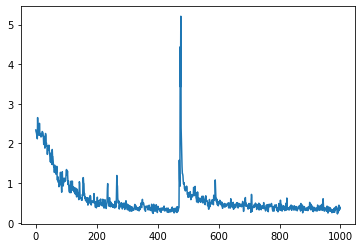

In [8]:
plt.plot(stats['loss'])

In [9]:
for (x, y) in life.data[0]:
    pred_model = np.argmax(life.model(x.to(life.device)).cpu().detach().numpy(), axis=1)
    out_true = y.cpu().numpy()
    acc = np.mean(pred_model == out_true)
    print(pred_model[:5], out_true[:5], acc)

[3 9 8 6 2] [3 9 8 6 2] 0.91015625
[7 4 8 1 7] [7 4 7 1 7] 0.919921875
[6 9 1 1 2] [6 9 1 1 0] 0.9140625
[3 4 3 1 8] [3 4 4 1 8] 0.900390625
[7 4 2 4 4] [7 4 2 4 4] 0.9140625
[3 3 7 6 9] [3 3 7 6 9] 0.927734375
[2 2 1 7 1] [2 2 1 7 1] 0.90625
[8 9 2 5 2] [8 9 2 5 2] 0.9140625
[9 7 5 1 6] [9 7 5 1 6] 0.89453125
[0 4 2 4 8] [0 4 2 4 8] 0.869140625
[4 4 0 5 7] [4 4 0 5 7] 0.908203125
[2 7 7 8 7] [2 7 1 8 7] 0.8984375
[5 5 5 9 5] [5 5 5 9 5] 0.89453125
[1 8 5 1 3] [3 8 5 1 3] 0.921875
[4 9 2 3 0] [4 9 2 3 0] 0.884765625
[0 5 5 2 9] [0 5 3 2 9] 0.900390625
[9 5 3 4 2] [9 5 3 4 2] 0.904296875
[7 7 8 3 8] [7 7 8 3 8] 0.892578125
[8 1 1 9 1] [5 1 1 9 6] 0.91015625
[1 8 8 7 3] [1 8 8 7 5] 0.9154411764705882


In [10]:
life.internals

{'optimizer': SGD (
 Parameter Group 0
     dampening: 0
     lr: 1.0139601230621338
     momentum: 0
     nesterov: False
     weight_decay: 0
 )}

In [11]:
# 0.93, 0.95 2048 bs
# 512 bs explode / 0.9